In [2]:
import math
import datetime
import pandas as pd
import pandas_datareader as web
import numpy as np
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [3]:
yf.pdr_override()
df = pdr.get_data_yahoo('NVDA', start='2010-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,4.627500,4.655000,4.527500,4.622500,4.240229,80020400
2010-01-05,4.605000,4.740000,4.605000,4.690000,4.302148,72864800
2010-01-06,4.687500,4.730000,4.642500,4.720000,4.329666,64916800
2010-01-07,4.695000,4.715000,4.592500,4.627500,4.244816,54779200
2010-01-08,4.590000,4.670000,4.562500,4.637500,4.253989,47816800
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


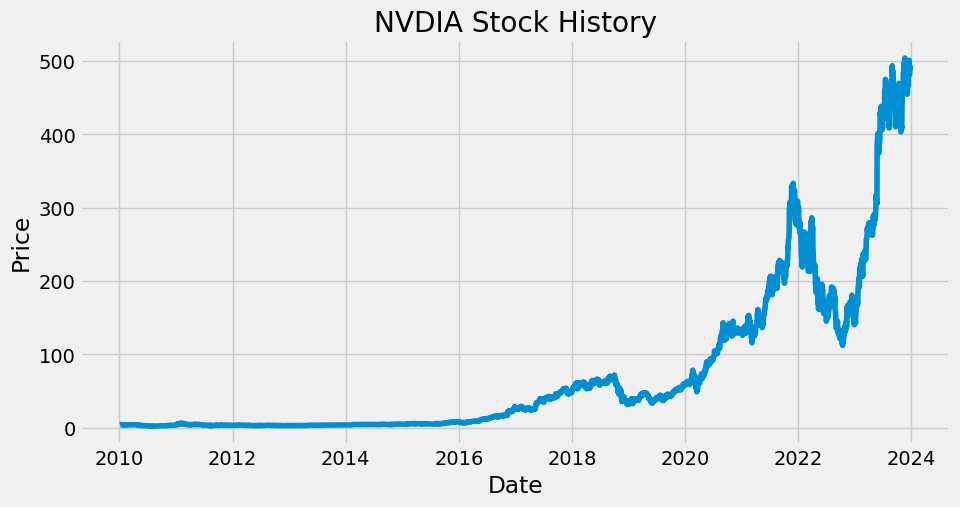

In [5]:
plt.figure(figsize=(10,5))
plt.title('NVDIA Stock History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Adj Close'])

In [6]:
data = df.filter(['Adj Close'])
dataset = data.values # convert to numpy array
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2818

In [7]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [8]:
len(scaled_data)

3522

In [9]:
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.0043902 , 0.00451355, 0.00456837, 0.00439934, 0.00441761,
       0.00429884, 0.0040156 , 0.00412524, 0.00399732, 0.00375977,
       0.00390596, 0.00387398, 0.00373236, 0.00346283, 0.00359074,
       0.00334862, 0.00354963, 0.0032938 , 0.00297401, 0.00351308,
       0.00359074, 0.0036547 , 0.003207  , 0.00335318, 0.00333948,
       0.00328009, 0.00342171, 0.00376434, 0.00386941, 0.0040156 ,
       0.00409326, 0.00355876, 0.00351764, 0.00353135, 0.00334862,
       0.00350394, 0.00343541, 0.00334405, 0.00364099, 0.00363642,
       0.00354049, 0.00355419, 0.00378718, 0.00367297, 0.00396078,
       0.00397905, 0.00379632, 0.00382373, 0.00378261, 0.00405671,
       0.00421204, 0.00391966, 0.00382373, 0.00395164, 0.0041161 ,
       0.003842  , 0.00386484, 0.00386484, 0.00396535, 0.00399732])]
[0.003892253449760355]



In [10]:
train_data

array([[0.0043902 ],
       [0.00451355],
       [0.00456837],
       ...,
       [0.25428032],
       [0.25154654],
       [0.258212  ]])

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Assuming scaled_data and training_data_len are defined

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaled_data)

# Prepare data for input to RNN
window_size = 60
train_generator = TimeseriesGenerator(scaled_data, scaled_data[:, 0], length=window_size, batch_size=1)

# Assuming you're using a sequential model in Keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator, epochs=10)


c:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
   3/3462 ━━━━━━━━━━━━━━━━━━━━ 2:14 39ms/step - loss: 0.0029 

c:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3462/3462 ━━━━━━━━━━━━━━━━━━━━ 105s 29ms/step - loss: 0.0034
Epoch 2/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 84s 24ms/step - loss: 3.8205e-04
Epoch 3/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 94s 27ms/step - loss: 2.9523e-04
Epoch 4/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 95s 27ms/step - loss: 2.0360e-04
Epoch 5/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 136s 39ms/step - loss: 1.8317e-04
Epoch 6/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - loss: 1.6572e-04
Epoch 7/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 120s 35ms/step - loss: 1.1826e-04
Epoch 8/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 123s 35ms/step - loss: 1.3508e-04
Epoch 9/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 121s 35ms/step - loss: 1.1988e-04
Epoch 10/10
3462/3462 ━━━━━━━━━━━━━━━━━━━━ 114s 33ms/step - loss: 1.1062e-04


In [12]:
# Generate predictions for test data
test_data = scaled_data[training_data_len - 60:]  # Assuming the last 60 points are for testing
test_input = []
for i in range(60, len(test_data)):
    test_input.append(test_data[i-60:i, 0])

test_input = np.array(test_input)  # Convert to numpy array
test_input = np.reshape(test_input, (test_input.shape[0], test_input.shape[1], 1))  # Reshape for LSTM input

predictions = model.predict(test_input)

# Print or visualize predictions
print("Predictions:")
print(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Predictions:
[[0.25547448]
 [0.2590553 ]
 [0.26084203]
 [0.25087956]
 [0.24966133]
 [0.25437522]
 [0.25363666]
 [0.24642178]
 [0.24250862]
 [0.24621141]
 [0.24912009]
 [0.2489762 ]
 [0.25700024]
 [0.26706898]
 [0.27302787]
 [0.2726855 ]
 [0.27704677]
 [0.2806603 ]
 [0.28263444]
 [0.2958708 ]
 [0.3073691 ]
 [0.30384734]
 [0.3163889 ]
 [0.31594834]
 [0.3058093 ]
 [0.2991984 ]
 [0.29978263]
 [0.29072964]
 [0.29527053]
 [0.29995015]
 [0.2998444 ]
 [0.29837677]
 [0.29890856]
 [0.29369655]
 [0.28941295]
 [0.2799858 ]
 [0.27922726]
 [0.2800855 ]
 [0.2854662 ]
 [0.27817646]
 [0.27731556]
 [0.2679679 ]
 [0.26396263]
 [0.2724326 ]
 [0.2738512 ]
 [0.2722766 ]
 [0.2729742 ]
 [0.2822808 ]
 [0.2913682 ]
 [0.30411905]
 [0.3087662 ]
 [0.31067833]
 [0.30708122]
 [0.31780493]
 [0.32098252]
 [0.32969448]
 [0.33511227]
 [0.34599993]
 [0.34970093]
 [0.34737885]
 [0.344461  ]
 [0.34410557]
 [0.3498348 ]
 [0.35442814]
 [0.3517542 ]
 [0.35123056]
 [0.36434186]
 [0.36809

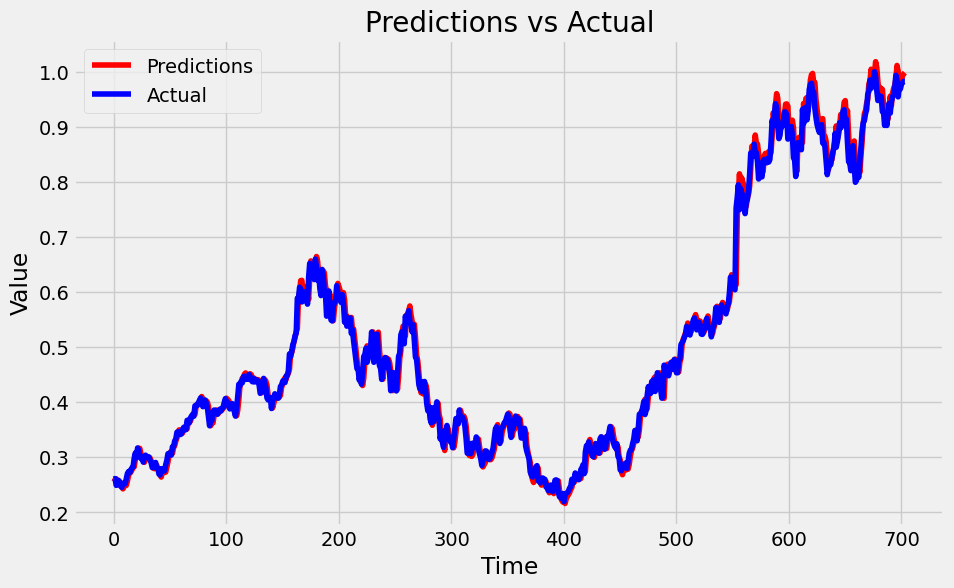

In [13]:
import matplotlib.pyplot as plt

# Assuming you have 'predictions' and 'test_data' defined

# Inverse transform the scaled data to get the original values
predictions_inverse = scaler.inverse_transform(predictions)
test_data_inverse = scaler.inverse_transform(test_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predictions_inverse, label='Predictions', color='red')
plt.plot(test_data_inverse[60:], label='Actual', color='blue')  # Assuming test data starts from index 60
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()
